# Introduction to Bayesian Learning
Author: Volker Krueger

## Numbers Dataset

We have a dataset of handwritten digits from 0 to 9

In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt
from PIL import Image
from scipy.stats import multivariate_normal
from numpy import inf


samples_per_class = 500
number_of_classes = 10

filelist = sorted(glob.glob('../data/*/*.png'))
x = np.array([np.array(Image.open(fname)) for fname in filelist])

y = np.zeros(number_of_classes * samples_per_class,dtype=int)
for cls in range(1,number_of_classes):
    y[(cls*500):(cls+1)*500] = cls   



## Visualizing the Dataset

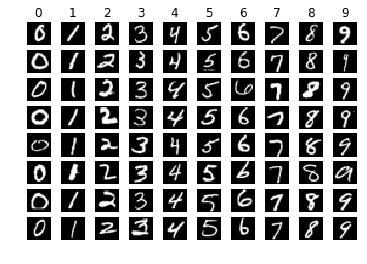

In [2]:
examples_per_class = 8
for cls in range(number_of_classes):
    idxs = np.where(y == cls)[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, number_of_classes, i * number_of_classes + cls + 1)
        plt.imshow(x[idx].astype('uint8'), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(str(cls))
plt.show()

## Mean

compute the mean of each class and display

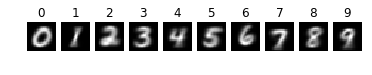

In [3]:
mean_of_class=np.zeros((10,20,20))
for cls in range(number_of_classes):
    idxs = np.where(y == cls)[0]
    mean_of_class[cls]=np.mean(x[idxs],axis=0)
    plt.subplot(1, number_of_classes, cls + 1)
    plt.imshow(mean_of_class[cls].astype('uint8'), cmap='gray')
    plt.axis('off')
    plt.title(str(cls))
plt.show()


## Generate Training and Testing data, and visualize

In [4]:
#######################################################################
# x_train will contain the training data
# y_train will contain the correct classes of the training data
# x_test will contain the test data
# y_test will contain the correct classes for the test data
#######################################################################
x_train=np.zeros((4000,20,20))
y_train=np.zeros(4000)
x_test =np.zeros((1000,20,20))
y_test =np.zeros(1000)

for cls in range(number_of_classes):
    idx=cls*400
    idx1=cls*500
    idx2=cls*100
    x_train[idx:idx+400,:,:]=x[idx1:idx1+400,:,:]
    y_train[idx:idx+400]=y[idx1:idx1+400]
    x_test[idx2:idx2+100,:,:]=x[idx1+400:idx1+500,:,:]
    y_test[idx2:idx2+100]=y[idx1+400:idx1+500]

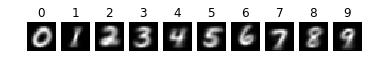

In [5]:
mean_of_class=np.zeros((10,20,20))
for cls in range(number_of_classes):
    idxs = np.where(y_train == cls)[0]
    mean_of_class[cls]=np.mean(x_train[idxs],axis=0)
    plt.subplot(1, number_of_classes, cls + 1)
    plt.imshow(mean_of_class[cls].astype('uint8'), cmap='gray')
    plt.axis('off')
    plt.title(str(cls))
plt.show()

## Calculate the variance

In [6]:
#Calculate the variance
variance_of_class=np.zeros((10,20,20))
for cls in range(number_of_classes):
    idxs = np.where(y_train == cls)[0]
    variance_of_class[cls]=np.var(x_train[idxs],axis=0)+1000

## put your code for the naive Bayesian classifier here

In [15]:
def NCC(x_test):
    y_test_pred = np.zeros((len(x_test),number_of_classes))
    for n in range(len(x_test)):
        image = x_test[n]
        result = []
        for cls in range(number_of_classes):
            mean = mean_of_class[cls]
            dist = np.linalg.norm(image-mean)
            result.append(dist)
         
        y_test_pred[n] = result
        
    y_test_pred = np.argmin(y_test_pred, axis=1)
    return y_test_pred

#input: x_test
#output: y_test_pred
def NaiveBayesian (x_test):
    y_test_pred = np.zeros((len(x_test),number_of_classes))
    for n in range(len(x_test)):
        image = x_test[n]
        result = []
        
        for cls in range(number_of_classes):
            mean = mean_of_class[cls]
            var = variance_of_class[cls]
                
            prob = 1 / np.sqrt(2 * np.pi * var) * np.exp(-np.square(image - mean)/(2 * var))  #probability density function
            log_prop = np.log(prob)
            sum_prop = np.sum(log_prop)
            result.append(sum_prop)
        
        y_test_pred[n] = result
        
    y_test_pred = np.argmax(y_test_pred, axis=1)
    return y_test_pred

## now lets run your code and evaluate your accuracy

In [16]:
# Evaluate your classifier on the test set
y_test_pred_naive = NaiveBayesian(x_test)
y_test_pred_ncc = NCC(x_test)

test_accuracy_naive = np.mean(y_test == y_test_pred_naive)
test_accuracy_ncc = np.mean(y_test == y_test_pred_ncc)

print ("Naive Bayesian: ", test_accuracy_naive)
print ("NCC: ", test_accuracy_ncc)

Naive Bayesian:  0.795
NCC:  0.796


## Let's visualize some of the wrongly classified test samples.

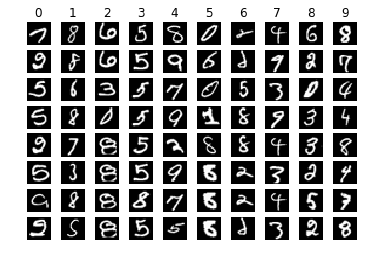

In [13]:
examples_per_class = 8
for cls in range(number_of_classes):
    idxs = np.where((y_test != cls) & (y_test_pred_naive == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=True)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, number_of_classes, i * number_of_classes + cls + 1)
        plt.imshow(x_test[idx].astype('uint8'), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(str(cls))
plt.show()